<h2><b>Case Hype 2024_1</b></h2>
<h3><b>Introdução</b></h3>
<p> 
Os membros do grupo Hype estão sempre em busca de expandir seus horizontes. Cada integrante do grupo possui objetivos pessoais e profissionais únicos, mas todos compartilham o mesmo espírito de curiosidade e vontade de aprender.

Nas reuniões regulares do grupo, cada membro compartilha suas metas e aspirações. Alguns estão focados em aprimorar suas habilidades técnicas, mergulhando a fundo em linguagens de programação ou explorando novas tecnologias emergentes. Outros estão mais interessados em desenvolver suas habilidades de liderança e comunicação, buscando oportunidades para assumir projetos desafiadores e trabalhar em equipe.

Além dos objetivos individuais, os membros do grupo Hype também compartilham um objetivo comum: compreender melhor os dados relacionados aos salários dos profissionais de TI e as características que influenciam sua oscilação. Eles reconhecem a importância de entender como fatores como experiência profissional, modalidade de trabalho e tempo de empresa afetam os salários na indústria de tecnologia.

Eles estão determinados a explorar os dados em profundidade, identificar padrões significativos e desenvolver modelos preditivos que possam fornecer orientação e clareza em um mercado de trabalho em constante evolução. 
</p>

<h3><b>Sobre o conjunto de dados</b></h3>

<ol>
    <li><b>pais:</b> País residente</li>
    <li><b>continente:</b> Continente</li>
    <li><b>idade:</b> Idade atual</li>
    <li><b>faixa_idade:</b> Classificação de faixa etária</li>
    <li><b>modalidade_exercicio:</b> Modalidade de exercício das atividades de TI</li>
    <li><b>contrato_trabalho:</b> Contrato de trabalho, em relação ao período de trabalho</li>
    <li><b>sou_estudante:</b> Se atualmente é estudante ou não</li>
    <li><b>sou_aposentado:</b> Se está aposentado ou não</li>
    <li><b>sou_freelancer:</b> Se atual como freelancer ou não</li>
    <li><b>buscando_trabalho:</b> Se está buscando trabalho ou não</li>
    <li><b>nivel_educacao:</b> Nível de escolaridade</li>
    <li><b>intervalo_min_anos_exp_pessoal:</b> Intervalo mínimo de anos de contato/experiência total na área (não necessariamente profissional)</li>
    <li><b>intervalo_max_anos_exp_pessoal:</b> Intervalo máximo de anos de contato/experiência total na área (não necessariamente profissional)</li>
    <li><b>intervalo_min_anos_exp_profissional:</b> Intervalo mínimo de anos de experiência profissional total na área</li>
    <li><b>intervalo_max_anos_exp_profissional:</b> Intervalo máximo de anos de experiência profissional total na área</li>
    <li><b>anos_atividade_atual:</b> Anos de exerção da atividade atual (seja emprego, freelancer, etc.)</li>
    <li><b>categoria_salario:</b> O salário representado em categorias</li>
</ol>

<h3><b>Tarefas do Case</b></h3>

<p>No geral, as tarefas se concentram no estudo e na compreensão dos dados, seja por meio de uma análise descritiva dos dados e na modelagem de um classificador para ser capaz de prever uma categoria de salário dado as características.</p>

<p><b>As tarefas são dividas em 5 seções:</b></p>
<ul>
    <li><b>Descrição dos dados:</b> Responder algumas questões levantadas pelos membros do Hype. <b>(2,5)</b></li>
    <li><b>Visualização dos dados:</b> Representação visual de algumas variáveis para facilitar o entedimento. <b>(1,5)</b></li>
    <li><b>Processamento e transformação dos dados:</b> Algumas etapas que deverão preceder a etapa da modelagem. <b>(2,5)</b></li>
    <li><b>Preparação dos dados e treinamento de um modelo classificador:</b> Treinamento de um modelo pré-implementado que classifica a faixa salarial. <b>(2,0)</b></li>
    <li><b>Avaliação do modelo:</b> Calcular algumas métricas de avaliação no conjunto de teste. <b>(1,5)</b></li>
</ul>

<p><b>Editar somente onde estiver marcado como "TODO" na célula</b></p>

<h3>Bibliotecas</h3> 

<p>Importação de bibliotecas que possivelmente serão utilizados ao longo do case</p>

In [1]:
import sys
print(sys.executable)

c:\Python312\python.exe


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# =========== TODO (opcional) ===========
# insira outras bibliotecas caso seja necessário...
from scipy.stats import shapiro 

<h3>Leitura dos dados</h3>

In [9]:
df = pd.read_parquet('dataset/final_case.parquet')

In [6]:
df.sample(5)

,pais,continente,idade,faixa_idade,modalidade_exercicio,contrato_trabalho,sou_estudante,sou_aposentado,sou_freelancer,buscando_trabalho,nivel_educacao,intervalo_min_anos_exp_pessoal,intervalo_max_anos_exp_pessoal,intervalo_min_anos_exp_profissional,intervalo_max_anos_exp_profissional,anos_atividade_atual,categoria_salario
57696,Bulgaria,Europe,42.0,Adults,Hybrid,Full-time,Nao,Nao,Nao,Nao,Bachelor,17.0,20.0,13.0,16.0,7.0,Low
63044,Romania,Europe,32.0,Youth,Remote,Full-time,Nao,Nao,Nao,Nao,Bachelor,5.0,8.0,1.0,4.0,1.0,Low
7158,France,Europe,34.0,Adults,Hybrid,Unemployed,Nao,Nao,Nao,Nao,Masters,5.0,8.0,5.0,8.0,3.0,Mid
76894,Russia,Asia,40.0,Adults,Hybrid,Full-time,Nao,Nao,Nao,Nao,Masters,21.0,24.0,13.0,16.0,10.0,Low
10461,India,Asia,33.0,Adults,Remote,Unemployed,Nao,Nao,Nao,Nao,Bachelor,9.0,12.0,9.0,12.0,6.0,Low


<h3><b>Seção 1: Descrição dos dados (2,5)</b></h3>

<p><b>Materiais de apoio: </b></p> 
<li>https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html</li>
<li>https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html</li>
<li>https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html</li>
<li>https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html</li>
<li>https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html</li>

<h4><b>Seção 1.1: Mostre o tipo de cada uma das colunas (0,5)</b></h4>

<p>É fundamental avaliar a corretude de tipagem das colunas de dados.</p>
<p><b>Por exemplo: </b> Avaliar se a coluna de 'pais' é uma string (texto) e a 'idade' é um int (número inteiro). </p>

In [7]:
# =========== TODO ===========
print(df.dtypes)

pais                                    object
continente                              object
idade                                  float64
faixa_idade                             object
modalidade_exercicio                    object
contrato_trabalho                       object
sou_estudante                           object
sou_aposentado                          object
sou_freelancer                          object
buscando_trabalho                       object
nivel_educacao                          object
intervalo_min_anos_exp_pessoal         float64
intervalo_max_anos_exp_pessoal         float64
intervalo_min_anos_exp_profissional    float64
intervalo_max_anos_exp_profissional    float64
anos_atividade_atual                   float64
categoria_salario                       object
dtype: object


<h4><b>Seção 1.2: Mostre a dimensão dos dados (0,5)</b></h4>

<p>Mostrar a quantidade de linhas e colunas a base possui.</p>

In [8]:
# =========== TODO ===========
num_linhas, num_colunas = df.shape
print("Número de linhas:", num_linhas)
print("Número de colunas:", num_colunas)

Número de linhas: 47916
Número de colunas: 17


<h4><b>Seção 1.3: Análise descritiva das colunas numéricas (0,5)</b></h4>

<p>Mostre algumas métricas gerais das colunas como a média, valor mínimo/máximo, contagem... (livre escolha)</p>

In [9]:
# =========== TODO ===========

### Calculando sobre a coluna 'Idade' ###

coluna = 'idade'

# Calculando as estatísticas 
media = df[coluna].mean()
minimo = df[coluna].min()
maximo = df[coluna].max()
desvio_padrao = df[coluna].std()

# Mostrando os resultados
print("=========== Para a coluna Idade ===========")
print(f"Média: {media}")
print(f"Valor mínimo: {minimo}")
print(f"Valor máximo: {maximo}")
print(f"Desvio padrão: {desvio_padrao}")


=========== Para a coluna Idade ===========
Média: 37.05804391384204
Valor mínimo: 16.0
Valor máximo: 79.0
Desvio padrão: 10.788733409866403


In [11]:
### Calculando sobre a coluna 'País' ###

coluna = 'categoria_salario'

# Calculando a moda, frequência relativa e absoluta
moda = df[coluna].mode()[0]
frequencia_absoluta = df[coluna].value_counts()
frequencia_relativa = df[coluna].value_counts(normalize=True)

# Mostrar os resultados
print("=========== Para categoria salário ===========")
print(f"Moda: {moda}")
print(f"Frequência absoluta: {frequencia_absoluta}")
print(f"Frequência relativa: {frequencia_relativa}")

=========== Para categoria salário ===========
Moda: Mid
Frequência absoluta: categoria_salario
Mid          12245
Low          11993
Very High    11973
High         11705
Name: count, dtype: int64
Frequência relativa: categoria_salario
Mid          0.255551
Low          0.250292
Very High    0.249875
High         0.244282
Name: proportion, dtype: float64


In [15]:
### Calculando sobre a coluna 'Modalidade Exercício' ###

coluna = 'modalidade_exercicio'

# Contanto os valores, agrupando por termos iguais
contagem = df[coluna].value_counts()

# Mostrar os resultados
print("=========== Para a coluna Modalidade Exercício ===========")
print("Contagem de valores agrupados por termos iguais na coluna:")
print(contagem)

=========== Para a coluna Modalidade Exercício ===========
Contagem de valores agrupados por termos iguais na coluna:
modalidade_exercicio
Remote       21124
Hybrid       20265
In-person     6520
Name: count, dtype: int64


<h4><b>Seção 1.4: Quais são os países distintos da base e a sua contagem? (0,5)</b></h4>

<p>A equipe precisa avaliar como está a distribuição dos países da base.</p>

In [16]:
# =========== TODO ===========

### Calculando sobre a coluna 'País' ###

coluna = 'pais'

# Contanto os valores, agrupando por termos iguais
contagem = df[coluna].value_counts()

# Mostrar os resultados
print("=========== Para a coluna País ===========")
print("Os países estão distribuídos da seguinte forma:")
print(contagem)

=========== Para a coluna País ===========
Os países estão distribuídos da seguinte forma:
pais
USA              11840
Germany           3966
UK                3535
Canada            2104
India             1865
                 ...  
Laos                 1
Tajikistan           1
Guyana               1
Liechtenstein        1
Sudan                1
Name: count, Length: 127, dtype: int64


<h4><b>Seção 1.5: Qual é a correlação entre a idade e o intervalo mínimo de anos de experiência profissional? (0,5)</b></h4>

<p>Colunas para analisar:</p>
<li>idade</li>
<li>intervalo_min_anos_exp_profissional</li>

In [10]:
# =========== TODO (Código) ===========

# Usando o teste de Shapito-Wilk para verificar se os dados seguem uma curva normal, para usar o teste de correlação de Pearson e argumentar sobre

# Excluindo NaN de idade e intervalo_min_anos_exp_profissional
df_limpo = df.dropna(subset=['idade', 'intervalo_min_anos_exp_profissional']).copy()

# Verificando se idade possui distribuição normal
stat, p = shapiro(df_limpo['idade'])
print('Estatísticas de Shapiro-Wilk para idade: {:.3f}, p-valor: {:.3f}'.format(stat, p))

# Verificando se intervalo_min_anos_exp_profissional possui distribuição normal
stat, p = shapiro(df_limpo['intervalo_min_anos_exp_profissional'])
print('Estatísticas de Shapiro-Wilk para intervalo_min_anos_exp_profissional: {:.3f}, p-valor: {:.3f}'.format(stat, p))

# =========== TODO (Preencher a resposta substituindo o 'None') ===========
correlacao = df_limpo['idade'].corr(df_limpo['intervalo_min_anos_exp_profissional']) 
print(f'A correlação entre idade e o intervalo_min_anos_exp_profissional é: {correlacao}')


# Foi usada a correlação de Pearson, e como o resultado foi próximo de 1 (além da sua normalidade), há uma correlação significativa, fortemente linear e positiva entre elas


Estatísticas de Shapiro-Wilk para idade: 0.955, p-valor: 0.000
Estatísticas de Shapiro-Wilk para intervalo_min_anos_exp_profissional: 0.846, p-valor: 0.000
A correlação entre idade e o intervalo_min_anos_exp_profissional é: 0.8229832121438871


c:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 47904.
  res = hypotest_fun_out(*samples, **kwds)


<h3><b>Seção 2: Visualização dos dados (1,5)</b></h3>

<p><i>Observação: "pyplot" está importado como "plt"</i></p>

<p><b>Materiais de apoio: </b></p> 
<li>https://mode.com/example-gallery/python_histogram</li>
<li>https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html</li>
<li>https://www.tutorialspoint.com/python-plot-a-pie-chart-for-pandas-dataframe-with-matplotlib</li>
<li>https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/</li>

In [62]:
# EXEMPLO DE AGRUPAMENTO DA COLUNA, USANDO FAIXA DE IDADE
agrupado = df.groupby(by='faixa_idade').agg(contagem=('faixa_idade', 'count')).reset_index()
agrupado

,faixa_idade,contagem
0,Adults,40826
1,Seniors,2111
2,Youth,4970


<h4><b>Seção 2.1: Crie um gráfico de pizza da distribuição de nível de educação (0,75)</b></h4>

<p>A equipe julgou que uma representação visual do gráfico de pizza seria o mais adequado.</p>
<p><i>Sinta-se a vontade para personalizar da forma como preferir</i></p>

In [11]:
# =========== TODO (Agrupamento) ===========

# EXEMPLO DE AGRUPAMENTO DA COLUNA, USANDO FAIXA DE IDADE
agrupado = df.groupby(by='nivel_educacao').agg(contagem=('nivel_educacao', 'count')).reset_index()
agrupado

,nivel_educacao,contagem
0,Associate,1593
1,Bachelor,22500
2,High School,2165
3,Masters,13015
4,Professional,2289
5,School,221
6,Self-Study,5637
7,Something else,490


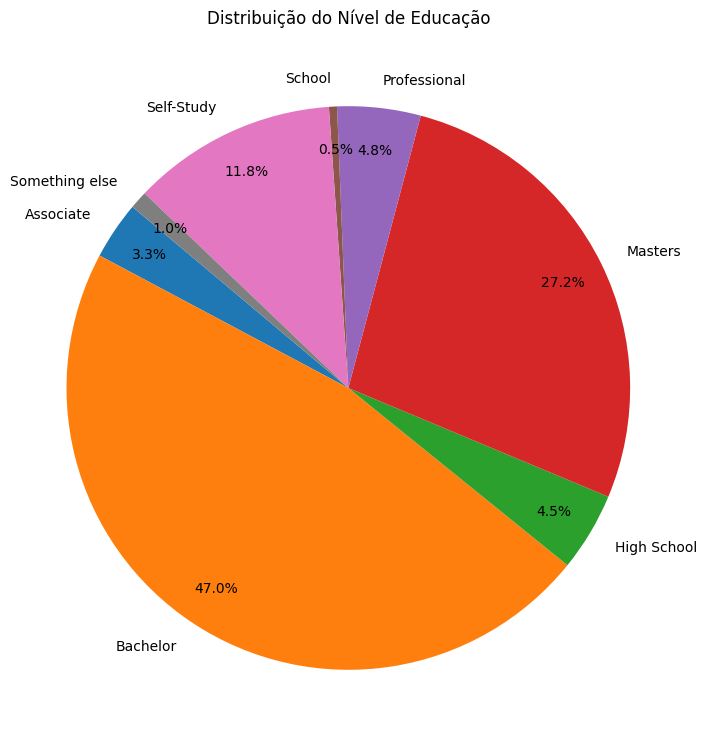

In [19]:
# =========== TODO (Gráfico) ===========

# Dados agrupados
nivel_educacao = agrupado['nivel_educacao']
contagem = agrupado['contagem']

# Criando o gráfico de pizza
plt.figure(figsize=(8, 8))

# Formatado como um número de ponto flutuante com uma casa decimal
plt.pie(contagem, labels=nivel_educacao, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
plt.title('Distribuição do Nível de Educação')
plt.axis('equal')  # Deixa o gráfico de pizza circular

# Ajustes
plt.subplots_adjust(top=1)

plt.show()

<h4><b>Seção 2.2: Crie um histograma de idade (0,75)</b></h4>

<p>A equipe necessita de um histograma para analisar como a idade está distribuída. Se possível, divida em 13 bins.</p>
<p><i>Sinta-se a vontade para personalizar da forma como preferir</i></p>

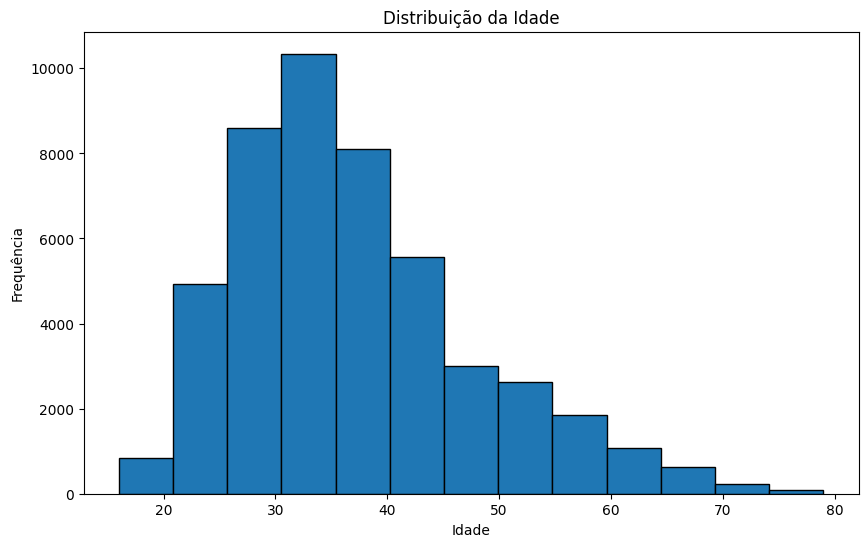

In [24]:
# =========== TODO (Gráfico) ===========

# Criando o histograma
plt.figure(figsize=(10, 6))
plt.hist(df['idade'], bins=13, edgecolor='black')  # Definindo 13 bins
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')

plt.show()

<h3><b>Seção 3: Processamento e transformação dos dados (2,5)</b></h3>

<p><i>Observação: Normalmente os dados nulos são representados como NaN</i></p>

<p><b>Materiais de apoio: </b></p> 
<li>https://pandas.pydata.org/docs/dev/reference/api/pandas.DataFrame.isna.html</li>
<li>https://saturncloud.io/blog/how-to-count-nan-values-in-a-pandas-dataframe-column/</li>
<li>https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html</li>
<li>https://www.datacamp.com/tutorial/python-select-columns</li>
<li>https://medium.com/codex/how-to-set-x-and-y-in-pandas-3f38584e9bed (abra na aba anônima)</li>
<li>https://www.alura.com.br/artigos/get-dummies-vs-onehotencoder-qual-metodo-escolher</li>
<li>https://www.c-sharpcorner.com/article/a-beginners-guide-to-one-hot-encoding-using-pandas-getdummies-method/</li>

<h4><b>Seção 3.1: Avalie integridade das colunas (0,5)</b></h4>

<p>Sempre há a necessidade de avaliar se a base de dados não possui dados nulos/vazios.</p>

In [30]:
# Verificar valores nulos em todas as colunas do DataFrame
valores_nulos_por_coluna = df.isnull().sum()
print("Valores nulos em cada coluna:\n", valores_nulos_por_coluna)

# Total de valores nulos no DataFrame
total_valores_nulos = df.isnull().sum().sum()
print("Total de valores nulos no DataFrame:", total_valores_nulos)

Valores nulos em cada coluna:
 pais                                   0
continente                             4
idade                                  4
faixa_idade                            9
modalidade_exercicio                   7
contrato_trabalho                      9
sou_estudante                          7
sou_aposentado                         7
sou_freelancer                         6
buscando_trabalho                      6
nivel_educacao                         6
intervalo_min_anos_exp_pessoal         7
intervalo_max_anos_exp_pessoal         7
intervalo_min_anos_exp_profissional    8
intervalo_max_anos_exp_profissional    5
anos_atividade_atual                   8
categoria_salario                      0
dtype: int64
Total de valores nulos no DataFrame: 100


<h4><b>Seção 3.2: Drop (não considerar) das linhas onde contém células nulas (0,5)</b></h4>

<p>A equipe decidiu que não deveríamos treinar o modelo com linhas onde há dado(s) inválido(s).</p>
<p><i>Dica: Você pode executar a célula anterior para avaliar se o código está correto.</i></p>

In [34]:
# =========== TODO ===========

# Remover todas as linhas com pelo menos um NaN em qualquer coluna
df = df.dropna().copy()

# Verificar o novo tamanho do DataFrame para confirmar a remoção
print("Novo número de linhas no DataFrame:", df.shape[0])

# Verificando se os NaN foram excluidos, mesmo código da célula anterior
valores_nulos_por_coluna = df.isnull().sum()
print("Valores nulos em cada coluna:\n", valores_nulos_por_coluna)

total_valores_nulos = df.isnull().sum().sum()
print("Total de valores nulos no DataFrame:", total_valores_nulos)

Novo número de linhas no DataFrame: 47817
Valores nulos em cada coluna:
 pais                                   0
continente                             0
idade                                  0
faixa_idade                            0
modalidade_exercicio                   0
contrato_trabalho                      0
sou_estudante                          0
sou_aposentado                         0
sou_freelancer                         0
buscando_trabalho                      0
nivel_educacao                         0
intervalo_min_anos_exp_pessoal         0
intervalo_max_anos_exp_pessoal         0
intervalo_min_anos_exp_profissional    0
intervalo_max_anos_exp_profissional    0
anos_atividade_atual                   0
categoria_salario                      0
dtype: int64
Total de valores nulos no DataFrame: 0


<h4><b>Seção 3.3: Faça uma separação das características e a variável que desejamos prever (0,5)</b></h4>

<p>A equipe precisa que você quebre os dados em 'X' e 'y'.</p>
<p>Armazene como 'y' a coluna que desejamos prever (categoria_salario) e como 'X' as demais colunas.</p>

In [44]:
# =========== TODO ===========

# X será o DataFrame contendo todas as colunas exceto 'categoria_salario'
X = df.drop('categoria_salario', axis=1)

# y será a Series contendo a coluna 'categoria_salario'
y = df['categoria_salario']

# Verificando 5 linhas de X para garantir que categoria_salario foi excluida
print("Primeiras linhas de X:")
X.sample(5)

Primeiras linhas de X:


,pais,continente,idade,faixa_idade,modalidade_exercicio,contrato_trabalho,sou_estudante,sou_aposentado,sou_freelancer,buscando_trabalho,nivel_educacao,intervalo_min_anos_exp_pessoal,intervalo_max_anos_exp_pessoal,intervalo_min_anos_exp_profissional,intervalo_max_anos_exp_profissional,anos_atividade_atual
69343,USA,North America,32.0,Adults,Hybrid,Full-time,Nao,Nao,Nao,Nao,Self-Study,9.0,12.0,9.0,12.0,5.0
34736,USA,North America,21.0,Adults,Remote,Full-time,Nao,Nao,Nao,Nao,Bachelor,1.0,4.0,1.0,4.0,1.0
54355,Russia,Asia,36.0,Adults,Remote,Unemployed,Nao,Nao,Nao,Nao,Bachelor,9.0,12.0,5.0,8.0,5.0
69560,Mexico,North America,29.0,Adults,Remote,Unemployed,Nao,Nao,Nao,Nao,Masters,13.0,16.0,5.0,8.0,1.0
71004,Australia,Oceania,41.0,Adults,In-person,Full-time,Nao,Nao,Nao,Nao,Bachelor,13.0,16.0,9.0,12.0,7.0


In [45]:
# Verificando 5 linhas de y para garantir que a separação foi feita corretamente
print("\nPrimeiras linhas de y:")
y.sample(5)


Primeiras linhas de y:


13081    Mid
544      Mid
16039    Mid
33121    Mid
77233    Low
Name: categoria_salario, dtype: object

<h4><b>Seção 3.4: Aplique um label encoding da variável ('y') que desejamos prever (0,5)</b></h4>

<p>Transforme a coluna categórica em numérica, representando as diferentes classes (categorias de salário)</p>
<p><b>Exemplo:</b> 'Low' como 0, 'Mid' como 1...</p>

In [46]:
# =========== TODO ===========

mapeamento_salario = {
    'Low': 0,
    'Mid': 1,
    'High': 2,
    'Very High': 3
}

# Aplicando o mapeamento para transformar as categorias em números
y = y.map(mapeamento_salario).copy()

# Verificando as primeiras linhas para garantir que a transformação foi aplicada corretamente
print("Primeiras linhas de y após label encoding:")
print(y.head())

Primeiras linhas de y após label encoding:
1    3
2    3
3    3
4    0
5    2
Name: categoria_salario, dtype: int64


<h4><b>Seção 3.5: Aplique um one-hot-encoding das características ('X') categóricas (0,5)</b></h4>

<p>Transforme as colunas categóricas em numérica por meio de one-hot-encoding.</p>

In [47]:
# =========== TODO ===========

# Aplicando one-hot-encoding às características categóricas em X
X = pd.get_dummies(X, dtype=int).copy()

# Verificando as primeiras linhas de X para garantir que a transformação foi aplicada corretamente
print("Pegando 5 linhas aleatórias do dataframe X atualizado:")
X.sample(5)

Pegando 5 linhas aleatórias do dataframe X atualizado:


,idade,intervalo_min_anos_exp_pessoal,intervalo_max_anos_exp_pessoal,intervalo_min_anos_exp_profissional,intervalo_max_anos_exp_profissional,anos_atividade_atual,pais_Afghanistan,pais_Africa,pais_Albania,pais_Andorra,...,sou_freelancer_Sim,buscando_trabalho_Nao,nivel_educacao_Associate,nivel_educacao_Bachelor,nivel_educacao_High School,nivel_educacao_Masters,nivel_educacao_Professional,nivel_educacao_School,nivel_educacao_Self-Study,nivel_educacao_Something else
66417,39.0,9.0,12.0,1.0,4.0,1.0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
52774,66.0,41.0,44.0,25.0,28.0,1.0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
53006,43.0,13.0,16.0,5.0,8.0,4.0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
40429,54.0,33.0,36.0,29.0,32.0,2.0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
31423,41.0,13.0,16.0,9.0,12.0,8.0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


<h3><b>Seção 4: Preparação dos dados e treinamento de um modelo classificador (2,0)</b></h3>

<p><b>Materiais de apoio: </b></p> 
<li>https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html</li>
<li>https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html</li>
<li>https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html</li>
<li>https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/</li>

In [71]:
# # EXECUTE ESSA CÉLULA CASO NÃO TENHA CONCLUÍDO A SEÇÃO 3, PARA OBTER O 'X' E 'y'
# X = pd.read_parquet('dataset/final_case_X.parquet')
# y = pd.read_parquet('dataset/final_case_y.parquet').categoria_salario

<h4><b>Seção 4.1: Faça a divisão dos dados de treinamento e teste (0,75)</b></h4>

<p>Queremos testar como o modelo performa com os dados desconhecidos, portanto vamos separar uma parte dos dados para o teste!</p>
<p>Depois de uma reunião, nós decidimos optar em dividir os dados para <b>80% de treinamento e 20% de teste.</b></p>

In [72]:
# =========== TODO ===========



<h4><b>Seção 4.2: Construa um classificador com os dados de treinamento (0,75)</b></h4>

<p>A equipe precisa de um modelo para utilizar como um baseline, mesmo que seja com os parâmetros padrões. Para isso, crie uma instância de modelo e faça inicie um treinamento com os dados de treino.</p>
<p><i>Fique à vontade para escolher o modelo que preferir, nós importamos o <b>RandomForestClassifier</b> e <b>DecisionTreeClassifier</b> como exemplos de uso.</i></p>

In [73]:
# =========== TODO ===========



<h4><b>Seção 4.3: Teste o modelo com os dados de teste (0,5)</b></h4>

<p>Utilize os dados de teste que foram separados na seção 4.1, nós precisamos avaliar com os dados que não foram utilizados na seção 4.2!</p>
<p>Armazene o retorno do modelo em uma variável.</p>

In [74]:
# =========== TODO ===========



<h4><b>Seção 4.1, 4.2 e 4.3: Faço o splitting dos dados, treine e teste um classificador (2,0)</b></h4>

<p><b>Não precisa realizar esse TODO caso tenha feito as seções 4.1, 4.2 e 4.3 (OPCIONAL). Será considerado apenas a pontuação de uma delas.</b></p>
<p>O time decidiu que você poderia desenvolver um modelo mais robusto, caso queira demonstrar suas habilidades!</p>
<p>Sinta-se à vontade para treinar outros classificadores, aplicar técnicas de validações cruzadas, realizar o tuning de hiperparâmetros e entre outros!</p> 

In [75]:
# =========== TODO ===========



<h3><b>Seção 5: Avaliação do modelo (1,5)</b></h3>

<p><b>Materiais de apoio: </b></p> 
<li>https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html</li>
<li>https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html</li>
<li>https://scikit-learn.org/stable/modules/model_evaluation.html</li>

In [76]:
# # EXECUTE ESSA CÉLULA CASO QUEIRA REALIZAR A SEÇÃO 5 MAS NÃO TENHA CONCLUÍDO A SEÇÃO 4, PARA OBTER UM EXEMPLO DE SAÍDA DA SEÇÃO 4.3
# y_test = np.load('dataset/exemplo_y_test.npy')      # labels do y_test (real)
# y_pred = np.load('dataset/exemplo_y_pred.npy')      # labels da saída do modelo (previsto)
# labels = [1, 2, 0, 3]
# target_names = ['Low', 'Mid', 'High', 'Very High']

<h4><b>Seção 5.1: Faça uma avaliação da saída do modelo com os dados de teste (1,5)</b></h4>

<p>Utilizem representações como matriz de confusão e principais métricas como acurácia, revocação, f1-score...</p>

In [77]:
# =========== TODO ===========

